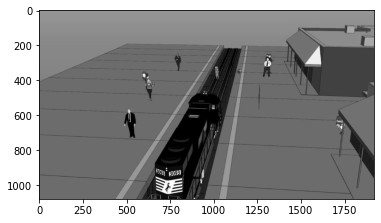

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


# Make path and categories
DATADIR = '../Static Frames/'
CATEGORIES = ['Danger', 'No Danger']

# For each category: read picture
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break


In [2]:
# Test data
print(img_array.shape)

(1080, 1920)


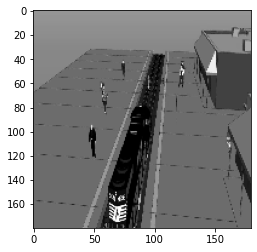

In [3]:
# REDEFINE IMG SIZE
IMG_SIZE = 180

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])

create_training_data()

In [5]:
print(training_data)

[[array([[150, 150, 150, ..., 150, 150, 150],
       [149, 149, 149, ..., 149, 149, 149],
       [149, 149, 149, ..., 149, 149, 149],
       ...,
       [108, 108, 108, ..., 108, 108, 108],
       [108, 108, 108, ..., 108, 108, 108],
       [108, 108, 108, ..., 108, 108, 108]], dtype=uint8), 0], [array([[132, 132, 132, ..., 132, 132, 132],
       [132, 132, 132, ..., 132, 132, 132],
       [132, 132, 132, ..., 132, 132, 132],
       ...,
       [135, 133, 132, ...,  90,  90,  90],
       [135, 133, 132, ...,  90,  90,  90],
       [134, 133, 132, ...,  90,  90,  90]], dtype=uint8), 0], [array([[129, 129, 129, ..., 216, 219,  95],
       [128, 128, 128, ..., 216, 216, 206],
       [128, 128, 128, ..., 216, 216, 213],
       ...,
       [142, 140, 133, ...,  88,  88,  88],
       [142, 121, 133, ...,  88,  88,  88],
       [142, 137, 134, ...,  87,  87,  87]], dtype=uint8), 0], [array([[143, 143, 143, ..., 143, 143, 143],
       [143, 143, 143, ..., 143, 143, 143],
       [143, 143, 143,

In [6]:
import random

random.shuffle(training_data)

In [7]:
for sample in training_data:
    print(sample[1])

1
0
0
0
1
1
1
1
0
1
1
0
1
1
0
0
0
1
0
0
0
0
0
1
0
1
1
1
0
0
0
1
1
1
0
0
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
0
0
0
1
1
1
0
1
0
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
1
1
1
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
1
0
1
1
0
1
0
1
0
0
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
0
0
1
0
0
0
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
1
0
1
0
1
0
0
0
1
1
1
1
1
1
1
0
0
0
0
1
1
1
0
0
0
1
0
1
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
1
1
0
0
0
1
0
1
0
1
0
1
1
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
1
0
0
1
1
1
1
0
1
1
0
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
1
0
0
1
1
0
1
1
1
1
0
1
0
1
0
0
0
1
0
0
1
0
1
0
1
1
0
1
0
1
1
0
1
0
0
1
1
0
1
0
0
1
1
1
0
1
0
1
1
0
0
0
0
1
0
1
0
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
0
0
0
0
1
0
0
0
0
1
1
0
0
1
0
0
1
1
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
0
1
1
0
1
1
1
1
0
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
1
0
0
1
1
0
1
0
1
0
0
1
0
1
0
0
0
1
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
0
1
1
0
1
1
0


In [9]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [10]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [13]:
print(X.shape[1:])

(180, 180, 1)
